In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")



Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


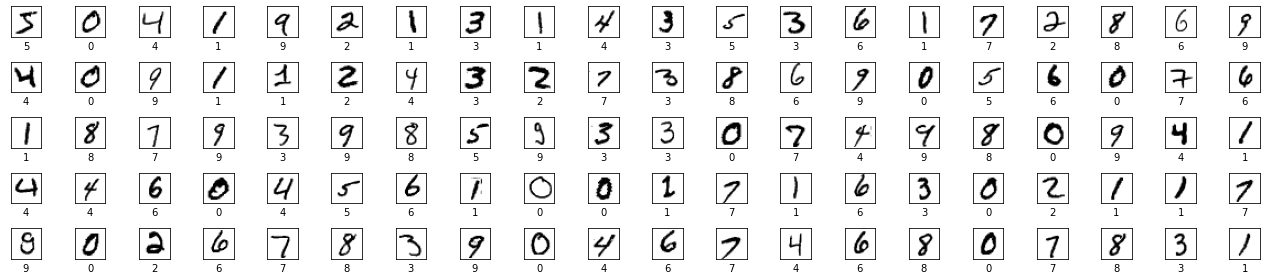

In [3]:
ROWS = 5
COLS = 20
i = 0

plt.figure(figsize=(18,4))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [4]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)
x_train_normalized = x_train.reshape(-1, 28,28,1)/255.0
x_test_normalized = x_test.reshape(-1, 28,28,1)/255.0


In [5]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [6]:
adam_model=model
sgd_model=model
rmsprop_model=model

In [7]:
adam_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
sgd_model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
rmsprop_model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Without The Normalized Data 

In [10]:
h = adam_model.fit(x=x_train, y=y_train, epochs=5,validation_split=0.2,batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 51s 28ms/step - loss: 0.3738 - accuracy: 0.9236 - val_loss: 0.1007 - val_accuracy: 0.9708
Epoch 2/5
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0988 - accuracy: 0.9735 - val_loss: 0.0827 - val_accuracy: 0.9771
Epoch 3/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0852 - accuracy: 0.9788 - val_loss: 0.1168 - val_accuracy: 0.9689
Epoch 4/5
1500/1500 [==============================] - 40s 26ms/step - loss: 0.0802 - accuracy: 0.9811 - val_loss: 0.0739 - val_accuracy: 0.9852
Epoch 5/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0825 - accuracy: 0.9816 - val_loss: 0.1193 - val_accuracy: 0.9807


In [11]:
test_loss, test_acc = adam_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.1253 - accuracy: 0.9777: 0s - loss: 0.1329 - accura

Test accuracy: 0.9776999950408936


In [12]:
x = sgd_model.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)


Epoch 1/5
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0866 - accuracy: 0.9819 - val_loss: 0.1011 - val_accuracy: 0.9792
Epoch 2/5
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0873 - accuracy: 0.9824 - val_loss: 0.1248 - val_accuracy: 0.9749
Epoch 3/5
1500/1500 [==============================] - 38s 26ms/step - loss: 0.0917 - accuracy: 0.9821 - val_loss: 0.1160 - val_accuracy: 0.9782
Epoch 4/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0907 - accuracy: 0.9825 - val_loss: 0.1153 - val_accuracy: 0.9772
Epoch 5/5
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0932 - accuracy: 0.9833 - val_loss: 0.1050 - val_accuracy: 0.9798


In [13]:
test_loss, test_acc = sgd_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.0926 - accuracy: 0.9823

Test accuracy: 0.9822999835014343


In [14]:
y = rmsprop_model.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0976 - accuracy: 0.9840 - val_loss: 0.1439 - val_accuracy: 0.9835
Epoch 2/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1100 - accuracy: 0.9824 - val_loss: 0.2543 - val_accuracy: 0.9768
Epoch 3/5
1500/1500 [==============================] - 38s 26ms/step - loss: 0.1176 - accuracy: 0.9824 - val_loss: 0.1322 - val_accuracy: 0.9831
Epoch 4/5
1500/1500 [==============================] - 53s 35ms/step - loss: 0.1090 - accuracy: 0.9840 - val_loss: 0.1471 - val_accuracy: 0.9837
Epoch 5/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1052 - accuracy: 0.9849 - val_loss: 0.1121 - val_accuracy: 0.9843


In [15]:
test_loss, test_acc = rmsprop_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.1018 - accuracy: 0.9843: 0s - loss: 0.1052 

Test accuracy: 0.9843000173568726


# Comparison without normalized data between  :  Adam vs SGD vs RMSProp 

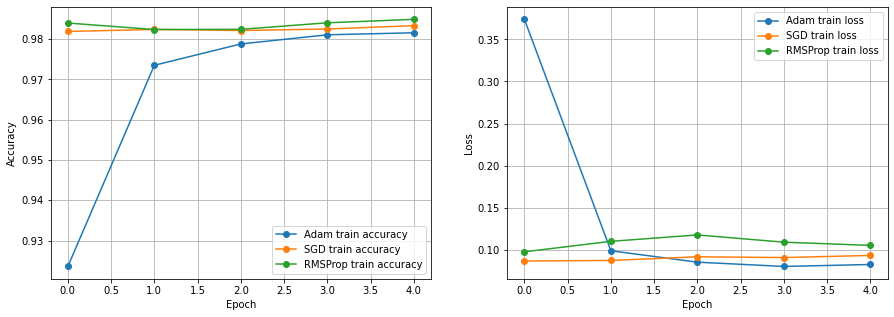

In [16]:
 plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(x.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(y.history['accuracy'], 'o-', label='RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='Train loss of Adam')
plt.plot(x.history['loss'], 'o-', label=' Train loss of SGD')
plt.plot(y.history['loss'], 'o-', label=' Train loss of RMSProp')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Comments

# With Normalized Data

In [17]:
h_normalized = adam_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 47s 30ms/step - loss: 0.2237 - accuracy: 0.9235 - val_loss: 0.0554 - val_accuracy: 0.9837
Epoch 2/5
1500/1500 [==============================] - 47s 32ms/step - loss: 0.0417 - accuracy: 0.9876 - val_loss: 0.0414 - val_accuracy: 0.9886
Epoch 3/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0426 - val_accuracy: 0.9883
Epoch 4/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0466 - val_accuracy: 0.9893
Epoch 5/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0236 - accuracy: 0.9931 - val_loss: 0.0673 - val_accuracy: 0.9856


In [18]:
test_loss, test_acc = adam_model.evaluate(x_test_normalized, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0557 - accuracy: 0.9864

Test accuracy: 0.9864000082015991


In [ ]:
x_normalized =sgd_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)


In [20]:
test_loss, test_acc = sgd_model.evaluate(x_train_normalized, y_test)
print('\nTest accuracy:', test_acc)

ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 10000
Make sure all arrays contain the same number of samples.

In [21]:
y_normalized = rmsprop_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)


Epoch 1/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0574 - val_accuracy: 0.9889
Epoch 2/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0202 - accuracy: 0.9941 - val_loss: 0.0440 - val_accuracy: 0.9890
Epoch 3/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.0560 - val_accuracy: 0.9885
Epoch 4/5
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0171 - accuracy: 0.9950 - val_loss: 0.0622 - val_accuracy: 0.9892 0.0171 
Epoch 5/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0163 - accuracy: 0.9955 - val_loss: 0.0599 - val_accuracy: 0.9904


In [22]:
test_loss, test_acc =rmsprop_model.evaluate (x_test_normalized, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0442 - accuracy: 0.9909

Test accuracy: 0.9908999800682068


# Normalized vs without Normalized data (adam)


In [23]:
lt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(h_normalized.history['accuracy'], 'o-', label = 'normalized data accuracy')
plt.plot(h_normalized.history['val_accuracy'], 'o-', label = 'normalized validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.plot(h_normalized.history['loss'], 'o-', label='normalized data loss')
plt.plot(h_normalized.history['val_loss'], 'o-', label='normalized validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

NameError: name 'lt' is not defined

# Analyzing the affect of using and not using data normalization:

Using normalized data in this model we got more accuracy than prior.
We can see in the above mentioned graph that the Adam's function performed much better accuracy in 1st epoch for normalized data. If we compare then we will see that the comparsion of accuracy was like this Adam>SGD>RMSprop.  Apparetly By using the data visualization we achieved more precision in our data training . 

From the below visualization graph, we find in every optimization function has more accuracy for normalization data.

# Displaying   normalized data in various optimization function 

NameError: name 'x_normalized' is not defined

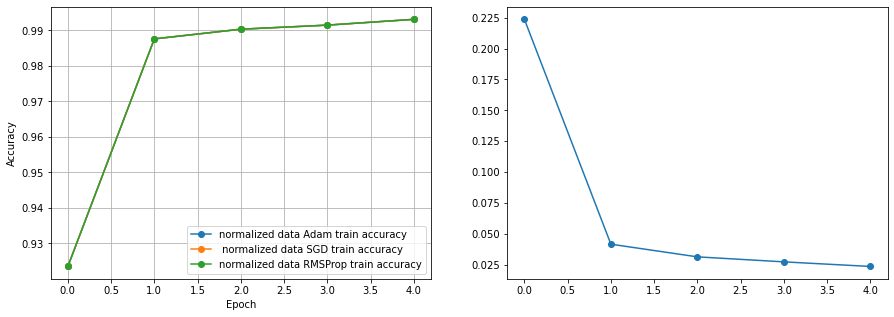

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h_normalized.history['accuracy'], 'o-', label='normalized data Adam train accuracy')
plt.plot(h_normalized.history['accuracy'], 'o-', label=' normalized data SGD train accuracy')
plt.plot(h_normalized.history['accuracy'], 'o-', label='normalized data RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h_normalized.history['loss'], 'o-', label='normalized data Adam train loss')
plt.plot(x_normalized.history['loss'], 'o-', label='normalized data SGD train loss')
plt.plot(y_normalized.history['loss'], 'o-', label='normalized data RMSProp train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Predictions

In [ ]:
predictions = adam_model.predict(x_test)

In [ ]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model_adam.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()